In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

In [15]:
def load_cifar10(
    batch_size: int = 64,
    shuffle: bool = True,
    train: bool = True,
):
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ]
    )
    dataset = datasets.CIFAR10(
        root=f"./data/{'train' if train else 'test'}",
        train=train,
        download=True,
        transform=transform,
    )
    dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
    )
    return dataloader


# Load the CIFAR-10 dataset
dataloader = load_cifar10(batch_size=10, shuffle=False, train=True)

Files already downloaded and verified


In [16]:
def create_gaussian_splats(
    image: torch.Tensor,
    sigma: float = 1.0,
):
    C, H, W = image.shape
    gaussians = []

    for channel in range(C):
        for i in range(H):
            for j in range(W):
                intensity = image[channel, i, j].item()
                if intensity != 0:
                    # Each pixel is represented as a Gaussian centered at its location with a given sigma.
                    gaussians.append(
                        {"center": (i, j), "intensity": intensity, "sigma": sigma}
                    )
    return gaussians


def save_gaussian_splats(
    dataloader: torch.utils.data.DataLoader,
    num_images: int,
    output_file: str,
    sigma: float = 1.0,
):
    all_gaussians = []
    count = 0

    for images, _ in dataloader:
        for image in images:
            if count >= num_images:
                break
            gaussians = create_gaussian_splats(image, sigma=sigma)
            all_gaussians.append(gaussians)
            count += 1
        if count >= num_images:
            break

    np.save(output_file, all_gaussians)
    print(f"Saved Gaussian splats for {num_images} images to {output_file}")


save_gaussian_splats(
    dataloader, num_images=100, output_file="./temp/gaussian_splats.npy", sigma=1.0
)

Saved Gaussian splats for 100 images to ./temp/gaussian_splats.npy


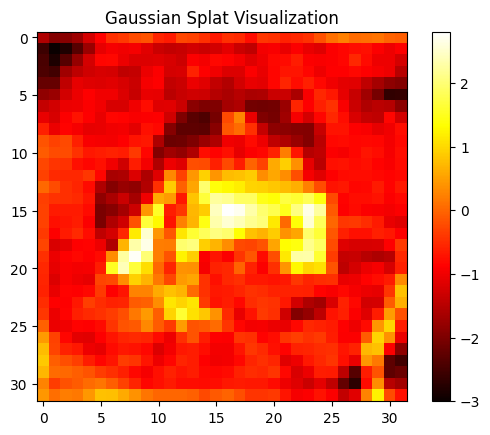

In [18]:
def visualize_gaussian_splats(
    gaussians: list,
    image_size: tuple,
):
    H, W = image_size
    visualization = np.zeros((H, W))

    for gaussian in gaussians:
        x, y = gaussian["center"]
        intensity = gaussian["intensity"]
        visualization[int(x), int(y)] += intensity

    plt.imshow(visualization, cmap="hot", interpolation="nearest")
    plt.colorbar()
    plt.title("Gaussian Splat Visualization")
    plt.show()


gaussian_data = np.load("./temp/gaussian_splats.npy", allow_pickle=True)
visualize_gaussian_splats(gaussian_data[0], image_size=(32, 32))